## 2. Machine Learning for Regression


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2.2 Data preparation

In [26]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [27]:
#!wget $data 

In [28]:
# Load the data into a DataFrame
df = pd.read_csv(data)

In [29]:
# show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Using df.info(), we can get information likes:
* Number of column and column name.
* Number of null count
* Data type

In [30]:
# change column name to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [31]:
# display the column names
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [32]:
# show the first 10 rows
df.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [33]:
# show unique values in the 'make' column and their counts
df['make'].value_counts()

make
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyke

In [34]:
# make the 'make' column lowercase and replace spaces with underscores
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [35]:
# list all columns with dtype = object
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [36]:
# convert all string columns to lowercase and replace spaces with underscores
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [37]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [38]:
# verify the changes by displaying the first 10 rows again
df.head(10)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


### Exploratory data analysis

In [39]:
# print unique values and their counts for each column
# to get count of unique values, use df[col].nunique() or len(df[col].unique())
# df[col].unique() returns an array of all unique values

for col in df.columns:
    print("column name: ", col)
    # print first 5 unique values
    print(df[col].unique()[:5])
    # print number of unique values
    print("Total unique values:", df[col].nunique())
    print()

column name:  make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Total unique values: 48

column name:  model
['1_series_m' '1_series' '100' '124_spider' '190-class']
Total unique values: 914

column name:  year
[2011 2012 2013 1992 1993]
Total unique values: 28

column name:  engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Total unique values: 10

column name:  engine_hp
[335. 300. 230. 320. 172.]
Total unique values: 356

column name:  engine_cylinders
[ 6.  4.  5.  8. 12.]
Total unique values: 9

column name:  transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Total unique values: 5

column name:  driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Total unique values: 4

column name:  number_of_doors
[ 2.  4.  3. nan]
Total unique values: 3

column name:  market_category
['factory_tuner,luxury,high-performance' 'luxu

Distribution of price

In [40]:
# show basic statistics for numerical columns
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


<Axes: >

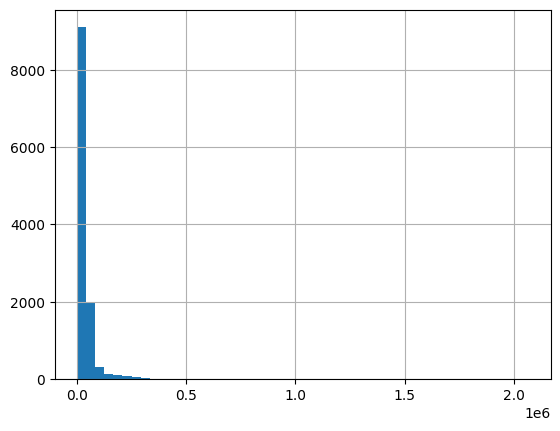

In [41]:
# plot data distribution for the 'msrp' column
# to plot histogram of the 'msrp' column
# use hist function
df.msrp.hist(bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

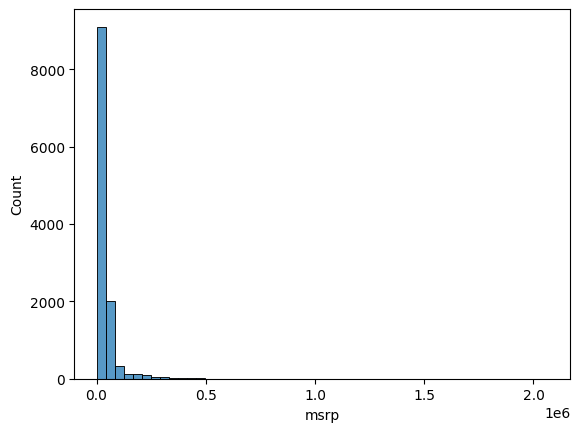

In [42]:
# another option, to plot histogram of the 'msrp' column using seaborn
sns.histplot(df.msrp, bins=50)

The histogram msrp it's skewed right, as most of the data are on the left side.

In [43]:
# to measure the skewness of the 'msrp' column
# Positive skew (> 0) → distribution is right-skewed (tail to the right).
# Negative skew (< 0) → distribution is left-skewed (tail to the left).
# Close to 0, the distribution is symmetrical.
print("Skewness of 'msrp': ", df.msrp.skew())

Skewness of 'msrp':  11.771987129334972


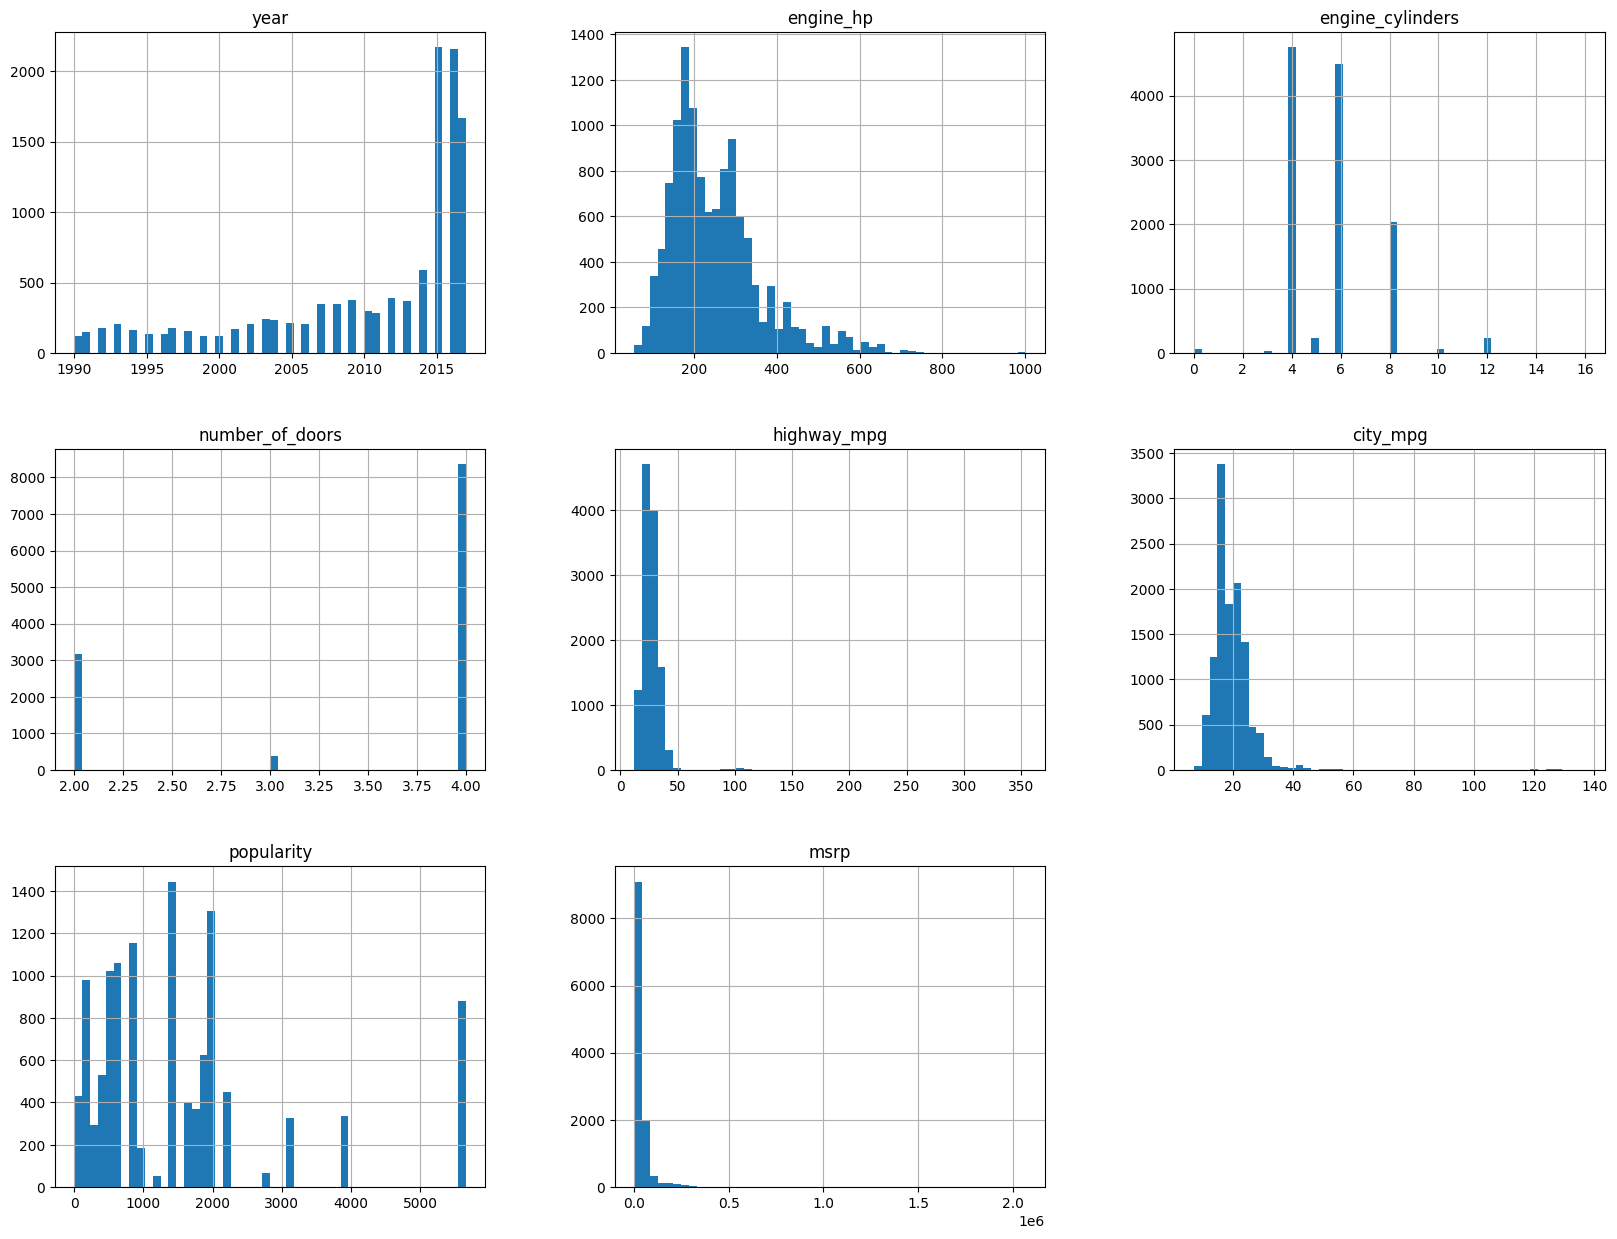

In [44]:
# plot histogram of all numerical columns
df.hist(bins=50, figsize=(20,15))

plt.show()

In [45]:
# calculate skewness

col_number = ['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']

df[col_number].skew()

year                -1.221981
engine_hp            1.291230
engine_cylinders     0.964542
number_of_doors     -0.968671
highway_mpg          7.573931
city_mpg             7.106681
popularity           1.653443
msrp                11.771987
dtype: float64

Columns engine_hp, engine_cyclinders, highway_mpg, city_mpg, msrp is skewed right.

Column year, number_of_doors is skewed left.



In [46]:
# using describe() function, we can see the skewness of the column
df[['year','highway_mpg','msrp']].describe()

,year,highway_mpg,msrp
count,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,26.637485,4.059474e+04
std,7.579740,8.863001,6.010910e+04
min,1990.000000,12.000000,2.000000e+03
25%,2007.000000,22.000000,2.100000e+04
50%,2015.000000,26.000000,2.999500e+04
75%,2016.000000,30.000000,4.223125e+04
max,2017.000000,354.000000,2.065902e+06


From describe() functon, we can get information about:
* count: number of rows
* mean: average value
* std: standard deviation
* min: minimum/smallest value 
* 25%: first quartile (Q1)
* 50%: median / second quartile (Q2)
* 75%: third quartile (Q3)
* max: maximum/highest value

How to interpretate Q1,Q2,Q3 values:
* Q1 25% it means: 25% of the data are less than or equal to Q1 value, and 75% of the data are greater than Q1 value.
* Q2 50% it means: 50% of the data are less than or equal to Q2 value, and 50% of the data are greater than Q2 value.
* Q3 75% it means: 75% of the data are less than or equal to Q3 value, and 25% of the data are greater than Q3 value.

Q1, Q2, Q3 is a threshold, not a proportions.

Example in column msrp:
* 25% (Q1)	21000.0
  
  25% of the data are less than or equal to 21000, and 75% of the data are greater than 21000.
* 50% (Q2)	29995.0
  
  Q2 50% it means: 50% of the data are less than or equal to 29995, and 50% of the data are greater than 29995.
* 75% (Q3)	42231.25
  
  Q3 75% it means: 75% of the data are less than or equal to 42231.25, and 25% of the data are greater than 42231.25.


As practice, we can compare mean and median to see the data is skew or not:
* median < mean -> skewed right.
* median > mean -> skewed left.
* median = mean -> not skew / roughly symmetric.

|        | year    | highway_mpg | msrp        |
|--------|---------|-------------|-------------|
| count  | 11914.0 | 11914.0     | 11914.0     |
| mean   | 2010.38 | 26.64       | 40594.74    |
| std    | 7.58    | 8.86        | 60109.10    |
| min    | 1990.0  | 12.0        | 2000.0      |
| 25%    | 2007.0  | 22.0        | 21000.0     |
| 50%    | 2015.0  | 26.0        | 29995.0     |
| 75%    | 2016.0  | 30.0        | 42231.25    |
| max    | 2017.0  | 354.0       | 2065902.0   |

Example from data above:
* year is skewed left
* highway_mpg is skewed right
* msrp is skewed right